# How many wins are needed to win?
I will read in the weekly results from the pick-em pool for the 2017 and 2018 NFL seasons and determine the number of wins that the top competitor had each week. In some weeks, this will be a perfect score of 16 and in other weeks that won't be the case. 

In [2]:
## Imports for data processing and plotting
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
%matplotlib inline

## Plot settings
plt.rcParams['xtick.major.width'] = .9
plt.rcParams['xtick.major.size'] = 8.
plt.rcParams['xtick.minor.size'] = 5.
plt.rcParams['xtick.minor.width'] = .9
plt.rcParams['xtick.labelsize'] = 19.
plt.rcParams['ytick.major.width'] = .9
plt.rcParams['ytick.major.size'] = 8.
plt.rcParams['ytick.minor.size'] = 5.
plt.rcParams['ytick.minor.width'] = .9
plt.rcParams['ytick.labelsize'] = 19.
plt.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.labelsize'] = 20.
matplotlib.rcParams['agg.path.chunksize'] = 10000
col1 = cm.viridis(np.linspace(0,0.8,13))
col2 = cm.Set2(np.linspace(0,1,8))
col3 = cm.Set3(np.linspace(0,1,12))

In [3]:
indir = '/Users/sydney/Desktop/data_science/NFL_pickem_DVOA/'
outdir = indir

week_arr = np.arange(1,18,1) #There are 17 weeks in the NFL regular season

## Read in Data
Save to arrays containing pool competitor names and number of wins per week

In [4]:
### Read in data for 2017 season
year = 2017
test_week = pd.read_csv(indir + str(year) + '_shirAmi_data/picks_139738_wk_1.csv')
test_week.dropna(inplace=True) #The table has one row with NaN values, remove that
test_week.rename(columns={'Unnamed: 0':'name'}, inplace=True)

### People in the pool
poolNames17 = np.unique(test_week['name'])
num_people17 = len(poolNames17)

### Array to fill
winsByWeek17 = np.zeros((num_people17, len(week_arr)))

for week in week_arr:
    weekData = pd.read_csv(indir + str(year) + '_shirAmi_data/picks_139738_wk_'+str(week)+'.csv')
    weekData.dropna(inplace=True) #The table has one row with NaN values, remove that
    weekData.rename(columns={'Unnamed: 0':'name'}, inplace=True)
    
    ### Sort competitor names (alphabetical)
    sortedByName = weekData.sort_values('name')
    
    ### Fill the current column of the winsByWeek array
    winsByWeek17[:,week-1] = sortedByName['Score']

In [5]:
### Read in data for 2018 season
year = 2018
test_week = pd.read_csv(indir + str(year) + '_shirAmi_data/picks_157625_wk_1.csv')
test_week.dropna(inplace=True) #The table has one row with NaN values, remove that
test_week.rename(columns={'Unnamed: 0':'name'}, inplace=True)

### People in the pool
poolNames18 = np.unique(test_week['name'])
num_people18 = len(poolNames18)

### Array to fill
winsByWeek18 = np.zeros((num_people18, len(week_arr)))

for week in week_arr:
    weekData = pd.read_csv(indir + str(year) + '_shirAmi_data/picks_157625_wk_'+str(week)+'.csv')
    weekData.dropna(inplace=True) #The table has one row with NaN values, remove that
    weekData.rename(columns={'Unnamed: 0':'name'}, inplace=True)
    
    ### Sort competitor names (alphabetical)
    sortedByName = weekData.sort_values('name')
    
    ### Fill the current column of the winsByWeek array
    winsByWeek18[:,week-1] = sortedByName['Score']

## How many wins do competitors get?

In [6]:
### Loop to get each person's win total for all weeks combined - 2017 season
totWinsByName17 = np.zeros(num_people17)
for n in range(num_people17):
    totWinsByName17[n] = np.sum(winsByWeek17[n,:])
    
### Loop to get each person's win total for all weeks combined - 2018 season
totWinsByName18 = np.zeros(num_people18)
for n in range(num_people18):
    totWinsByName18[n] = np.sum(winsByWeek18[n,:])

## Compare both seasons with a histogram

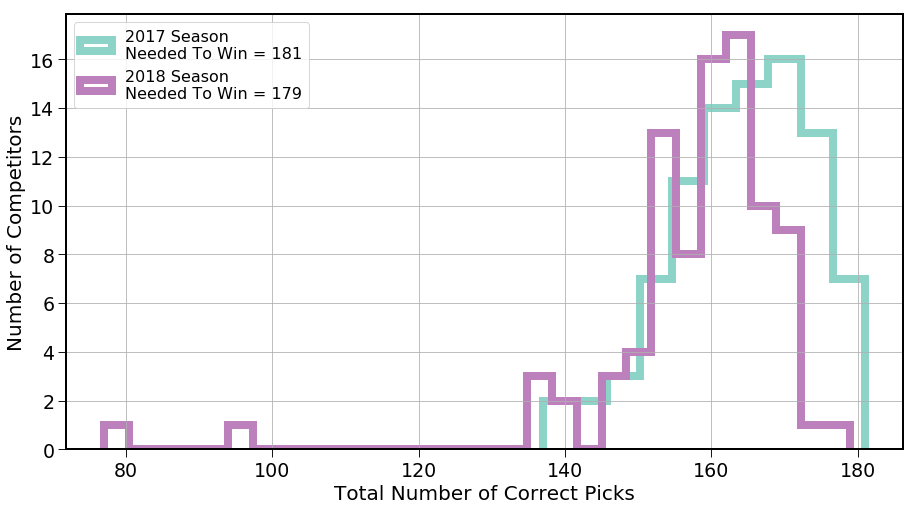

In [7]:
## Set up plot
fig=plt.figure(figsize=(15.0,8.0))
ax1=fig.add_subplot(111)
ax1.grid()

plt.hist(totWinsByName17, bins=10, histtype='step', color = col3[0], linewidth = 8)
plt.hist(totWinsByName18, bins=30, histtype='step', color = col3[9], linewidth = 8)

plt.legend(['2017 Season \nNeeded To Win = '+str(int(np.max(totWinsByName17))), 
            '2018 Season \nNeeded To Win = '+str(int(np.max(totWinsByName18)))], fontsize=16, loc='upper left')

plt.xlabel('Total Number of Correct Picks')
plt.ylabel('Number of Competitors')

- The pool competitors were better at picking the winner of NFL games in 2017 than they were in 2018
- The outliers with low scores in 2018 are likely due to competitors who did not enter picks in the pool before games began, causing them to automatically lose

## Export weekly wins data to files
Make new dataframes for each year containing competitor names and their number of wins per week. Save these new dataframes to csv files

In [8]:
### Make 2017 wins dataframe
data_wins_2017 = {'Name':poolNames17,
                 'total_wins': totWinsByName17,
                 'week_01': winsByWeek17[:,0],
                 'week_02': winsByWeek17[:,1],
                 'week_03': winsByWeek17[:,2],
                 'week_04': winsByWeek17[:,3],
                 'week_05': winsByWeek17[:,4],
                 'week_06': winsByWeek17[:,5],
                 'week_07': winsByWeek17[:,6],
                 'week_08': winsByWeek17[:,7],
                 'week_09': winsByWeek17[:,8],
                 'week_10': winsByWeek17[:,9],
                 'week_11': winsByWeek17[:,10],
                 'week_12': winsByWeek17[:,11],
                 'week_13': winsByWeek17[:,12],
                 'week_14': winsByWeek17[:,13],
                 'week_15': winsByWeek17[:,14],
                 'week_16': winsByWeek17[:,15],
                 'week_17': winsByWeek17[:,16],}
winsList17 = pd.DataFrame(data_wins_2017)
winsList17.to_csv(outdir + '2017_shirAmi_data/winsByWeek_2017.csv')

In [9]:
### Make 2018 wins dataframe
data_wins_2018 = {'Name':poolNames18,
                 'total_wins': totWinsByName18,
                 'week_01': winsByWeek18[:,0],
                 'week_02': winsByWeek18[:,1],
                 'week_03': winsByWeek18[:,2],
                 'week_04': winsByWeek18[:,3],
                 'week_05': winsByWeek18[:,4],
                 'week_06': winsByWeek18[:,5],
                 'week_07': winsByWeek18[:,6],
                 'week_08': winsByWeek18[:,7],
                 'week_09': winsByWeek18[:,8],
                 'week_10': winsByWeek18[:,9],
                 'week_11': winsByWeek18[:,10],
                 'week_12': winsByWeek18[:,11],
                 'week_13': winsByWeek18[:,12],
                 'week_14': winsByWeek18[:,13],
                 'week_15': winsByWeek18[:,14],
                 'week_16': winsByWeek18[:,15],
                 'week_17': winsByWeek18[:,16],}
winsList18 = pd.DataFrame(data_wins_2018)
winsList18.to_csv(outdir + '2018_shirAmi_data/winsByWeek_2018.csv')